In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv('train.csv')
print(d0.head(5))
l=d0['label']   # stores all the labels i.e 0-9
d=d0.drop("label",axis=1) # stores all the data apart from labels
print(d.shape)
print(l.shape)


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

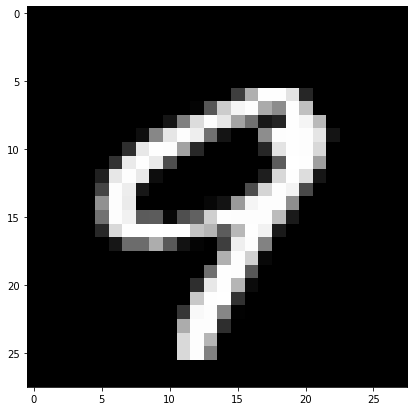

9


In [2]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].to_numpy().reshape(28,28)  # reshape 1d to 28*28 matrix
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

## 2D Visualization using PCA

In [3]:
# TAKING 15K points

labels=l.head(15000)
data=d.head(15000)
print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


In [5]:
# data pre processing : standadrdizing the data
from sklearn.preprocessing import StandardScaler
standradized_data=StandardScaler().fit_transform(data)
print(standradized_data.shape)

(15000, 784)


In [9]:
# find the co_variance matrix
sample_data=standradized_data  

# matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

print("the shape of co-variance matrix =",covar_matrix.shape)

the shape of co-variance matrix = (784, 784)


In [15]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("shape of eigen vectors=",vectors.shape)
vectors=vectors.T
print("updated shape of eigen vectors=",vectors.shape)

shape of eigen vectors= (784, 2)
updated shape of eigen vectors= (2, 784)


In [17]:
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
print("resultant new data points shape",vectors.shape,"X",sample_data.shape,"=",new_coordinates.shape)

resultant new data points shape (2, 784) X (15000, 784) = (2, 15000)


In [21]:
import pandas as pd
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


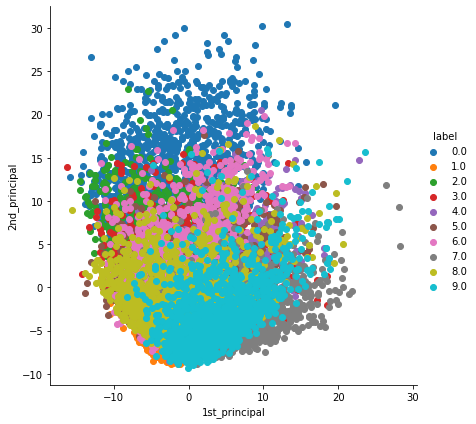

In [24]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit Learn

In [25]:
from sklearn import decomposition
pca=decomposition.PCA()

In [35]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data) # standardize

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


C:\Users\shubh\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


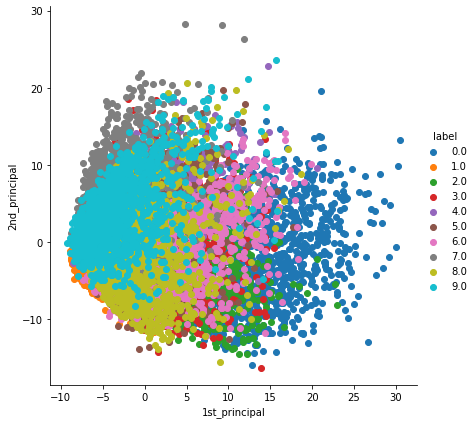

In [36]:
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()